# Pre-Class 8.1

We will use the value of $q$ as calculated by the root finding function to determine the theoretical estimate for the size of the LCC in a network with average degree $⟨k⟩$.
We know that $q$ is the probability that a random node from the network is not part of the largest connected component (LCC). Using this definition, we can say that the number of nodes not in the LCC is $n - N_{LCC}$, which can be used to define $q$ mathematically as a probability (i.e., being one of those non-LCC nodes over the total number of nodes): 
$$q = \frac{n - N_{LCC}}{n}$$

We can npow manipulate this probability to obtain $N_{LCC}$ in terms of $q$ (i.e., the value we want in terms of the value we obtain):
$$
\begin{align}
q &= \frac{n - N_{LCC}}{n} \\
qn &= n - N_{LCC} \\
N_{LCC} &= n(1-q)
\end{align}
$$

We will use this expression to find the relationship between the average degree $<k>$ and the size of the LCC $N_{LCC}$:

In [13]:
from scipy.optimize import root
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


def calculate_q(k):
    '''
    Use a numerical root finder to determine q from the equation
    q = exp(k*(q­1)).
    '''
    return root(lambda q: q - np.exp(k * (q - 1)), 0).x[0]

In [14]:
# Defining n for all
n = 1000

average_k = np.arange(1, 10, 0.1)
q = np.ones(len(average_k))

for i in range(len(average_k)):
    q[i] = calculate_q(average_k[i])

N_LCC = n * (1 - q)

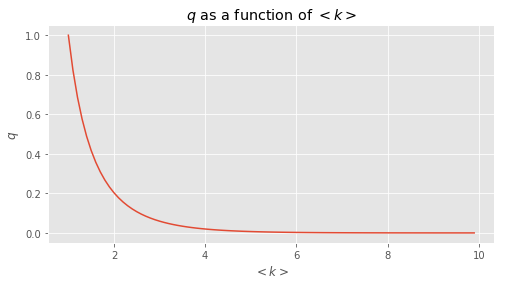

In [19]:
plt.figure(figsize=(8,4))
plt.plot(average_k, q)
plt.title("$q$ as a function of $<k>$")
plt.xlabel("$<k>$")
plt.ylabel("$q$")
plt.show()

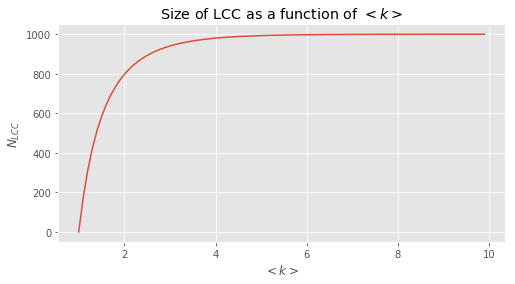

In [20]:
plt.figure(figsize=(8,4))
plt.plot(average_k, N_LCC)
plt.title("Size of LCC as a function of $<k>$")
plt.xlabel("$<k>$")
plt.ylabel("$N_{LCC}$")
plt.show()